In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r'D:\Data Analyst Projects\100 Projects\4- Coffee Shop Sales\4- Coffee Shop Sales.xlsx')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [3]:
missing_values= df.isnull().sum()
missing_values

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [5]:
df['transaction_time']=df['transaction_time'].astype(str)
df['transaction_time']=pd.to_timedelta(df['transaction_time'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  int64          
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   transaction_qty   149116 non-null  int64          
 4   store_id          149116 non-null  int64          
 5   store_location    149116 non-null  object         
 6   product_id        149116 non-null  int64          
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4), timedelta64[ns](1)
memory usage: 12.5+ MB


In [7]:
df['sales']=df['transaction_qty']*df['unit_price']

In [8]:
df['datetime']=df['transaction_date']+df['transaction_time']
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,datetime
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41


In [9]:
df.describe()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,product_id,unit_price,sales,datetime
count,149116.000000,149116,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116
mean,74737.371872,2023-04-15 11:50:32.173609984,0 days 12:14:15.815794415,1.438276,5.342063,47.918607,3.382219,4.686367,2023-04-16 00:04:47.989404160
min,1.000000,2023-01-01 00:00:00,0 days 06:00:00,1.000000,3.000000,1.000000,0.800000,0.800000,2023-01-01 07:06:11
25%,37335.750000,2023-03-06 00:00:00,0 days 09:05:10.500000,1.000000,3.000000,33.000000,2.500000,3.000000,2023-03-06 13:37:08
50%,74727.500000,2023-04-24 00:00:00,0 days 11:15:28,1.000000,5.000000,47.000000,3.000000,3.750000,2023-04-24 08:24:32.500000
75%,112094.250000,2023-05-30 00:00:00,0 days 15:25:57,2.000000,8.000000,60.000000,3.750000,6.000000,2023-05-30 07:16:13
max,149456.000000,2023-06-30 00:00:00,0 days 20:59:32,8.000000,8.000000,87.000000,45.000000,360.000000,2023-06-30 20:57:19
std,43153.600016,NaN,0 days 03:45:57.901686173,0.542509,2.074241,17.930020,2.658723,4.227099,NaN


In [10]:
df_locations=df.groupby('store_location').agg({'sales' : 'sum' , 'transaction_id' : 'count'})
df_locations

,sales,transaction_id
store_location,,
Astoria,232243.91,50599
Hell's Kitchen,236511.17,50735
Lower Manhattan,230057.25,47782


In [11]:
daily_sales_by_location=df.groupby(['transaction_date','store_location'])['sales'].sum().unstack()
daily_sales_by_location

store_location,Astoria,Hell's Kitchen,Lower Manhattan
transaction_date,,,
2023-01-01,868.40,851.45,788.35
2023-01-02,925.50,828.80,649.05
2023-01-03,902.75,906.25,756.00
2023-01-04,808.25,781.65,630.20
2023-01-05,903.05,714.90,800.90
...,...,...,...
2023-06-26,1975.10,1746.10,2154.70
2023-06-27,1861.55,1676.70,2437.40
2023-06-28,1758.10,1445.85,1524.95


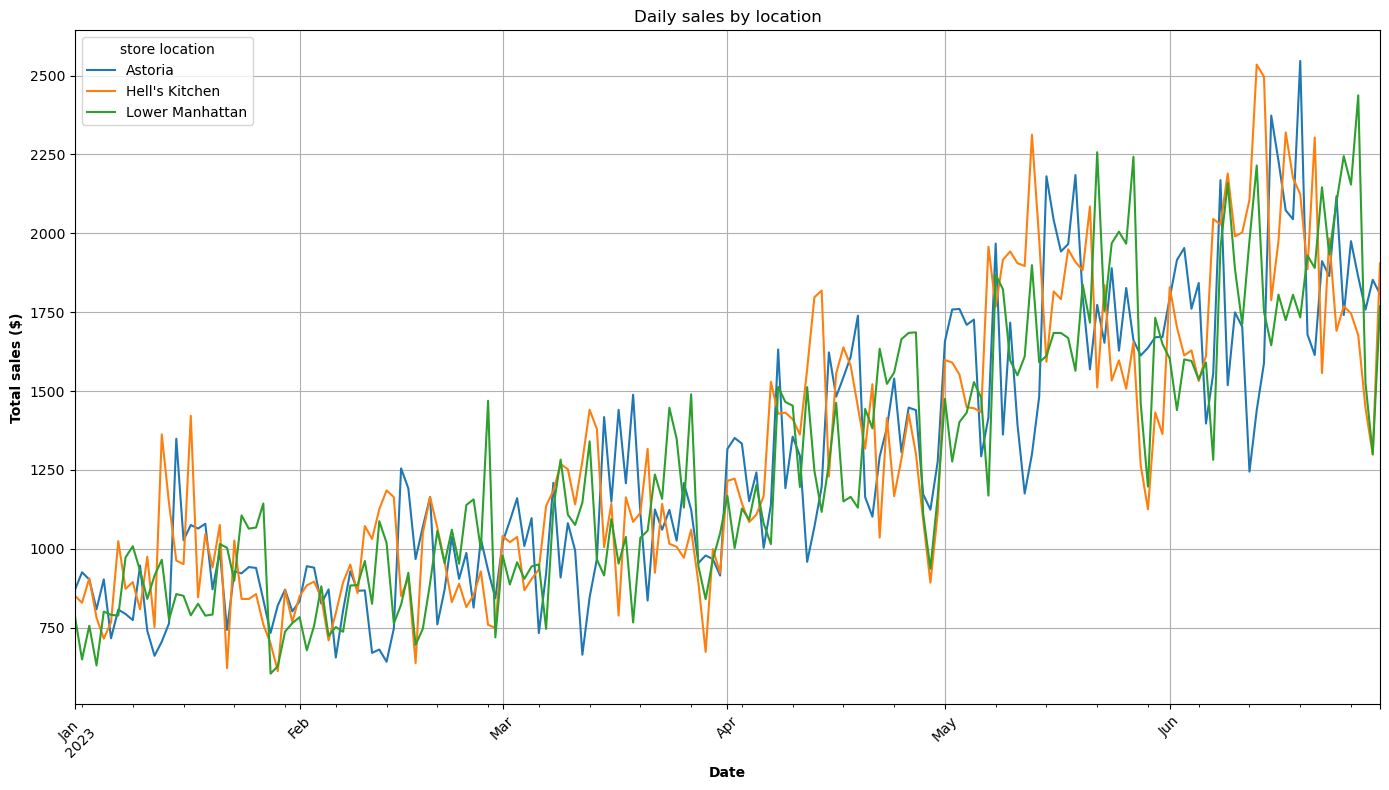

In [12]:
daily_sales_by_location.plot(figsize=(14,8) , title='Daily sales by location')

plt.xlabel('Date' , fontweight='bold')
plt.ylabel('Total sales ($)' , fontweight='bold')
plt.legend(title = 'store location' )
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

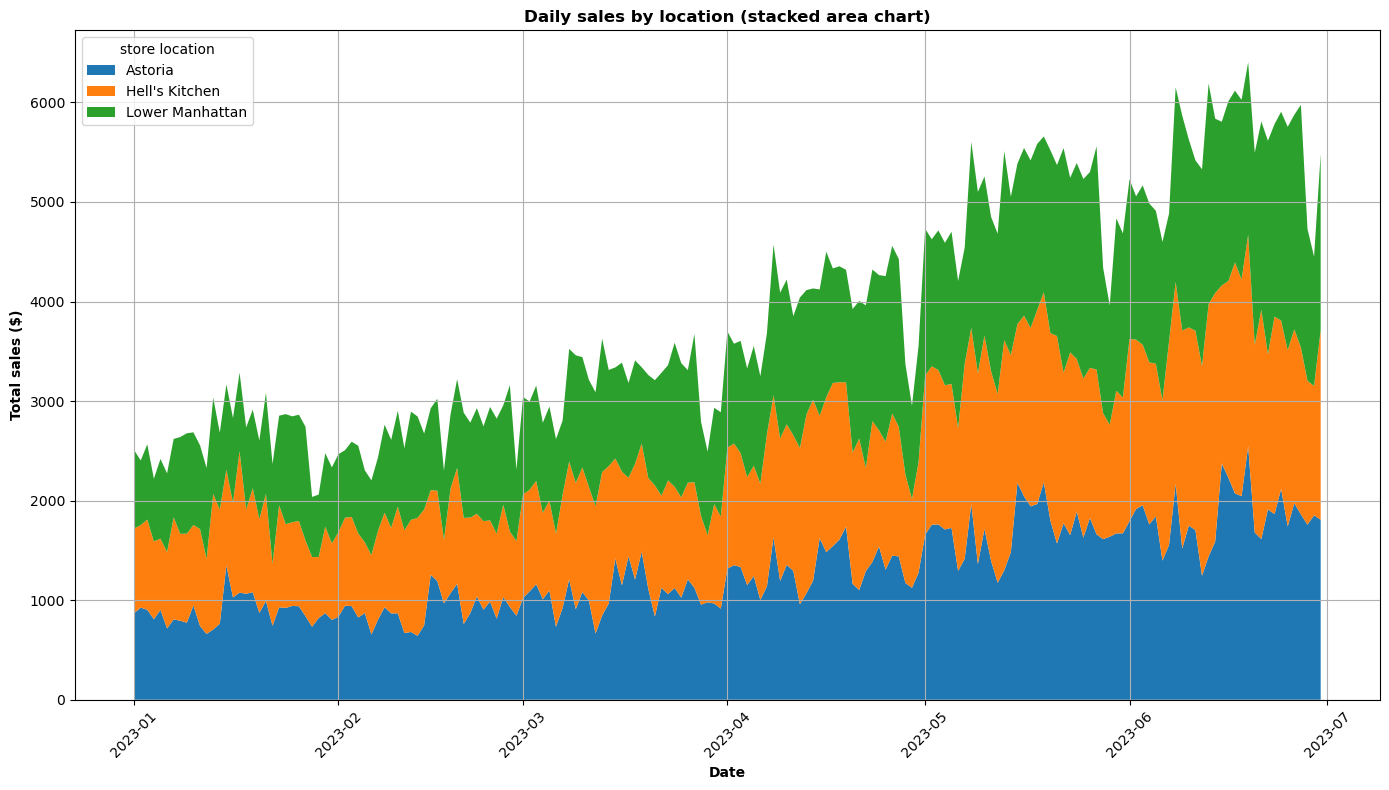

In [13]:
plt.figure(figsize=(14,8))

plt.stackplot(daily_sales_by_location.index , daily_sales_by_location.T , labels=daily_sales_by_location.columns)

plt.title ('Daily sales by location (stacked area chart)' , fontweight='bold')
plt.xlabel('Date' , fontweight='bold')
plt.ylabel('Total sales ($)' , fontweight='bold')
plt.legend(title = 'store location' , loc='upper left' )
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [14]:
daily_sales=df.groupby('transaction_date')['sales'].sum().reset_index()

df['day_of_week']=df['datetime'].dt.day_name()

weekly_sales=df.groupby('day_of_week')['sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

df['month']=df['datetime'].dt.to_period('M')
monthly_sales=df.groupby('month')['sales'].sum().reset_index()

daily_sales, weekly_sales, monthly_sales

(    transaction_date    sales
 0         2023-01-01  2508.20
 1         2023-01-02  2403.35
 2         2023-01-03  2565.00
 3         2023-01-04  2220.10
 4         2023-01-05  2418.85
 ..               ...      ...
 176       2023-06-26  5875.90
 177       2023-06-27  5975.65
 178       2023-06-28  4728.90
 179       2023-06-29  4450.75
 180       2023-06-30  5481.32
 
 [181 rows x 2 columns],
   day_of_week      sales
 0      Monday  101677.28
 1     Tuesday   99455.94
 2   Wednesday  100313.54
 3    Thursday  100767.78
 4      Friday  101373.00
 5    Saturday   96894.48
 6      Sunday   98330.31,
      month      sales
 0  2023-01   81677.74
 1  2023-02   76145.19
 2  2023-03   98834.68
 3  2023-04  118941.08
 4  2023-05  156727.76
 5  2023-06  166485.88)

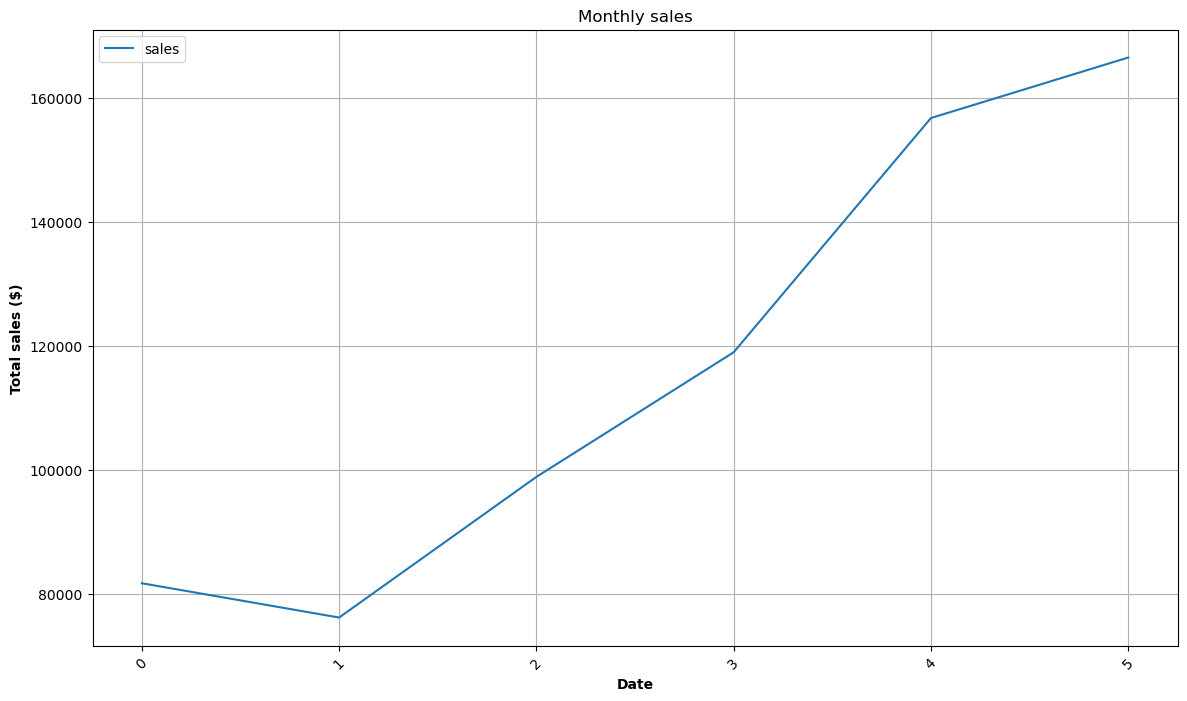

In [15]:
monthly_sales.plot(figsize=(14,8) , title='Monthly sales'  )

plt.xlabel('Date' , fontweight='bold')
plt.ylabel('Total sales ($)' , fontweight='bold')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout

plt.show()

In [16]:
weekly_sales = df.groupby(['day_of_week' , 'store_location'])['sales'].sum().unstack()

days_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(days_order)
weekly_sales

store_location,Astoria,Hell's Kitchen,Lower Manhattan
day_of_week,,,
Monday,33928.29,33389.51,34359.48
Tuesday,31816.76,34846.47,32792.71
Wednesday,34244.63,33779.09,32289.82
Thursday,34140.37,33468.06,33159.35
Friday,33472.75,34743.18,33157.07
Saturday,31845.93,32599.23,32449.32
Sunday,32795.18,33685.63,31849.50


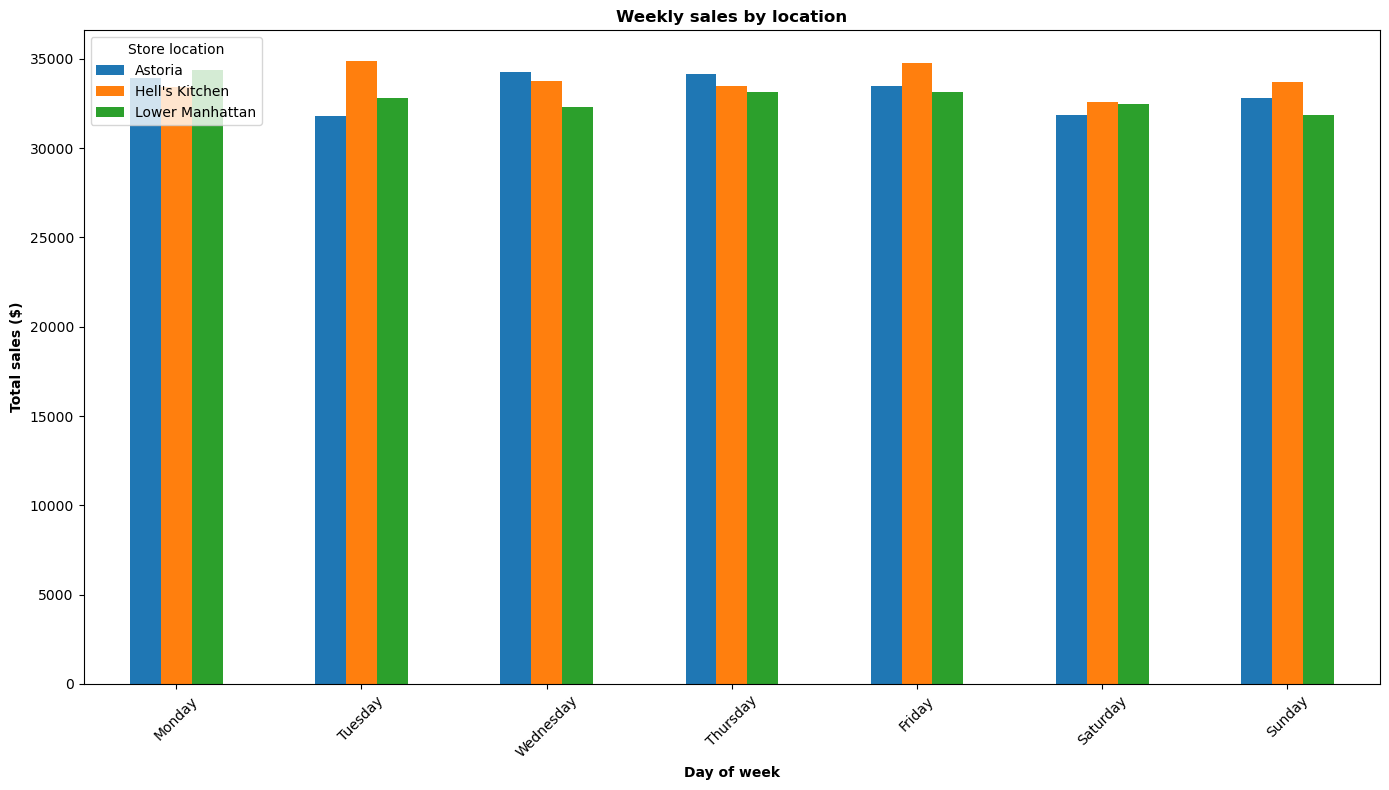

In [17]:
weekly_sales[["Astoria", "Hell's Kitchen", "Lower Manhattan"]].plot(kind="bar", figsize=(14,8))

plt.xlabel('Day of week' , fontweight='bold')
plt.ylabel('Total sales ($)' , fontweight='bold')
plt.xticks(rotation=45)
plt.title('Weekly sales by location', fontweight='bold')
plt.legend(title='Store location'  , loc='upper left')
plt.tight_layout()

plt.show()

In [18]:
df_category=df.groupby('product_category').agg({
    'sales' : 'sum', 'transaction_id' : 'count'
}).sort_values('sales' , ascending = False )

df_category

,sales,transaction_id
product_category,,
Coffee,269952.45,58416
Tea,196405.95,45449
Bakery,82315.64,22796
Drinking Chocolate,72416.00,11468
Coffee beans,40085.25,1753
Branded,13607.00,747
Loose Tea,11213.60,1210
Flavours,8408.80,6790
Packaged Chocolate,4407.64,487


In [19]:
df['hour']=df['datetime'].dt.hour

hourly_sales_by_broduct = df.groupby(['hour' , 'product_category'])['sales'].sum().unstack()

hourly_sales_by_broduct

product_category,Bakery,Branded,Coffee,Coffee beans,Drinking Chocolate,Flavours,Loose Tea,Packaged Chocolate,Tea
hour,,,,,,,,,
6,2677.95,406.0,7811.95,874.45,2770.50,430.4,614.45,258.52,6056.05
7,7948.44,1754.0,23579.90,3602.20,6507.25,985.6,1229.05,680.18,17239.85
8,10417.84,2098.0,30579.85,5444.75,8166.00,1224.8,1403.85,605.78,22759.00
9,10523.91,2035.0,31014.85,7353.25,7787.50,1176.0,2072.15,383.82,22823.05
10,10982.50,1745.0,33297.10,7608.70,8070.50,1532.8,1608.45,799.79,23028.55
11,5612.06,532.0,18188.15,3295.20,4853.75,427.2,457.95,248.88,12703.95
12,4180.44,470.0,16162.90,1384.15,4416.50,333.6,476.50,101.60,12667.10
13,4421.08,966.0,16620.95,1566.65,4415.00,339.2,458.55,260.12,11319.90
14,4740.46,428.0,16725.35,1573.95,4637.50,356.8,471.30,238.88,12132.50


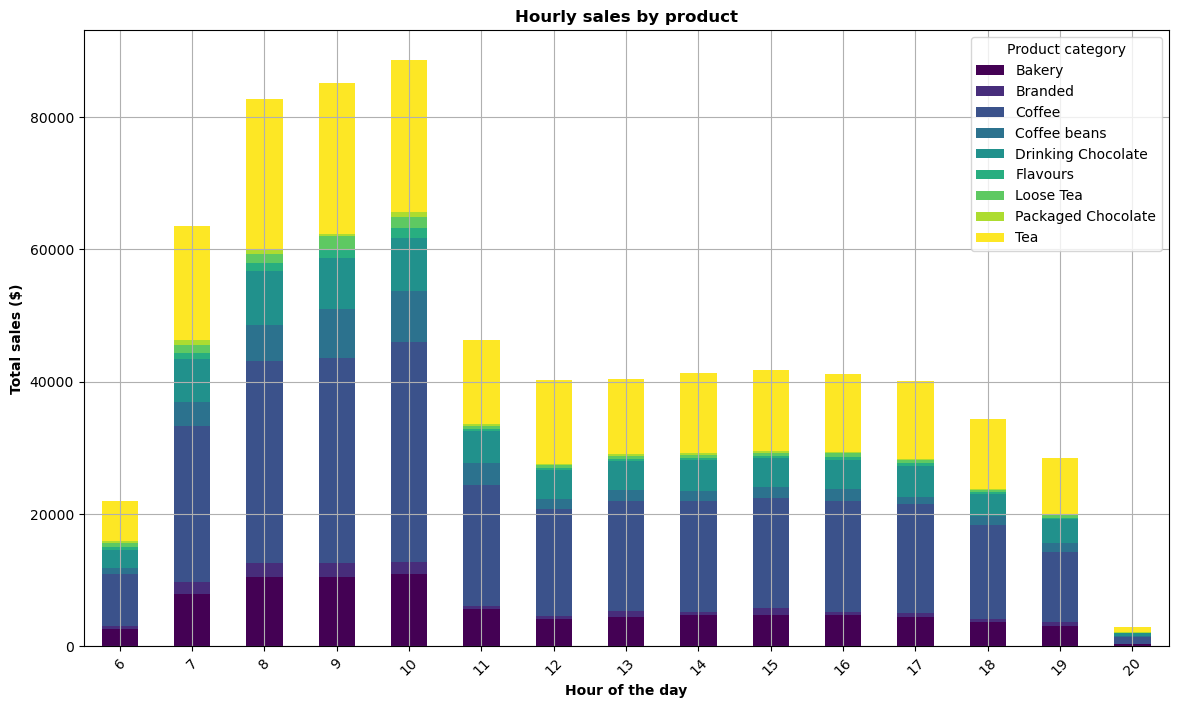

In [20]:
hourly_sales_by_broduct.plot(kind='bar' , stacked='tree' , figsize=(14,8) , colormap='viridis')

plt.title('Hourly sales by product' , fontweight='bold')
plt.xlabel('Hour of the day' , fontweight='bold' )
plt.ylabel('Total sales ($)' , fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Product category' , loc='upper right')
plt.grid(True)
plt.tight_layout

plt.show()

In [21]:
df_category['avg_sales']=df_category['sales']/df_category['transaction_id']

df_category.round(2)

,sales,transaction_id,avg_sales
product_category,,,
Coffee,269952.45,58416,4.62
Tea,196405.95,45449,4.32
Bakery,82315.64,22796,3.61
Drinking Chocolate,72416.00,11468,6.31
Coffee beans,40085.25,1753,22.87
Branded,13607.00,747,18.22
Loose Tea,11213.60,1210,9.27
Flavours,8408.80,6790,1.24
Packaged Chocolate,4407.64,487,9.05


In [22]:
sales_by_product=df.groupby('product_type').agg({ 
    'sales' : 'sum' , 'unit_price' : 'mean' 
}).sort_values('sales' ,ascending = False )

sales_by_product.round(2)

,sales,unit_price
product_type,,
Barista Espresso,91406.20,3.66
Brewed Chai tea,77081.95,2.94
Hot chocolate,72416.00,4.15
Gourmet brewed coffee,70034.60,2.70
Brewed Black tea,47932.00,2.74
Brewed herbal tea,47539.50,2.74
Premium brewed coffee,38781.15,3.12
Organic brewed coffee,37746.50,2.90
Scone,36866.12,3.53


In [23]:
sales_by_category_and_product=df.groupby(['product_category' , 'product_type'])['sales'].sum().reset_index()

sales_by_category_and_product

,product_category,product_type,sales
0,Bakery,Biscotti,19793.53
1,Bakery,Pastry,25655.99
2,Bakery,Scone,36866.12
3,Branded,Clothing,6163.00
4,Branded,Housewares,7444.00
5,Coffee,Barista Espresso,91406.20
6,Coffee,Drip coffee,31984.00
7,Coffee,Gourmet brewed coffee,70034.60
8,Coffee,Organic brewed coffee,37746.50
9,Coffee,Premium brewed coffee,38781.15


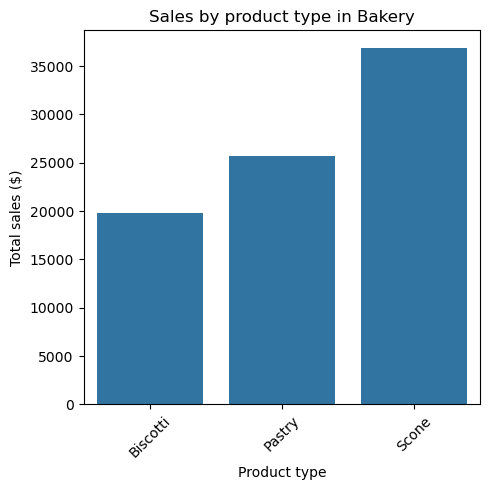

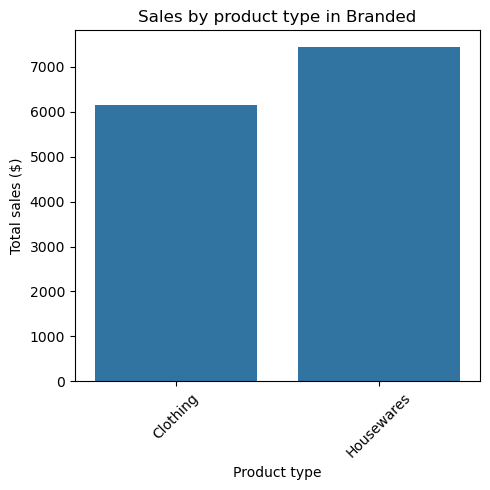

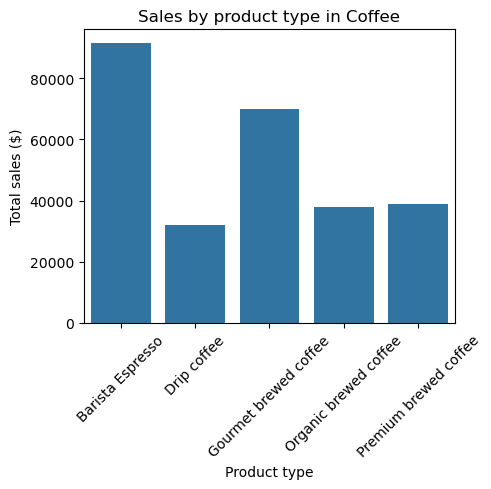

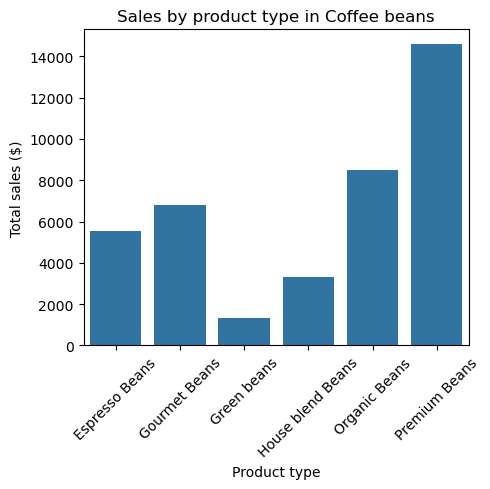

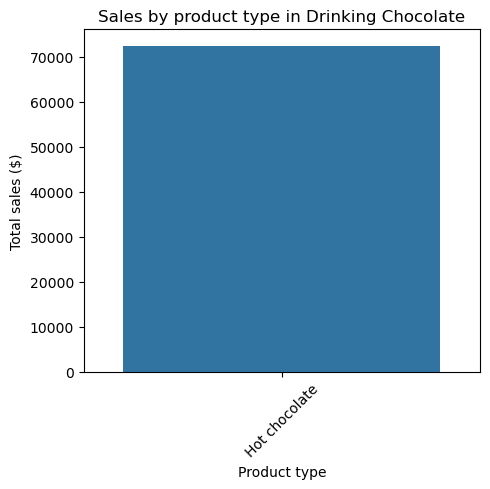

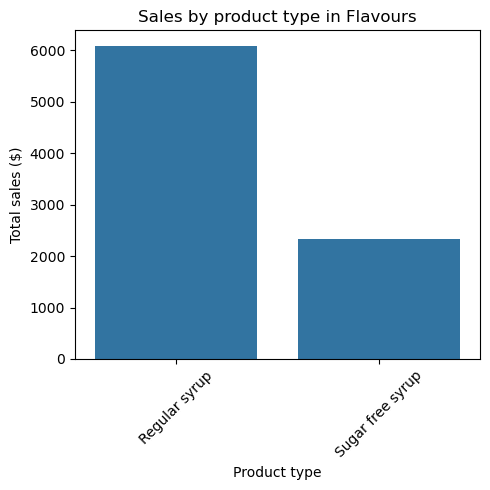

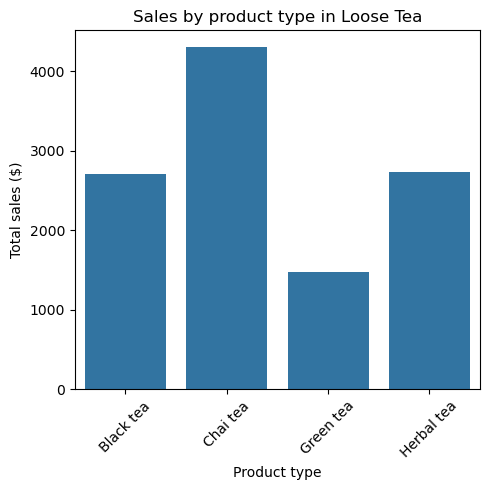

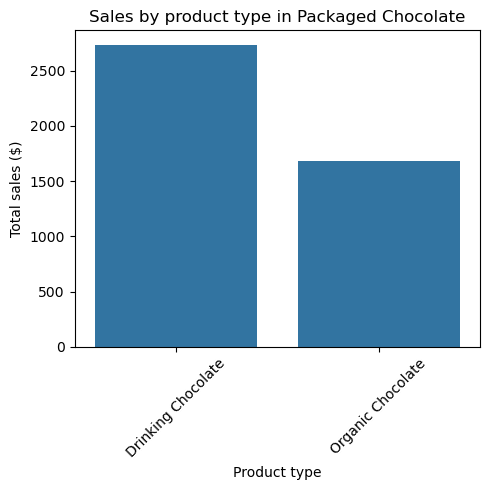

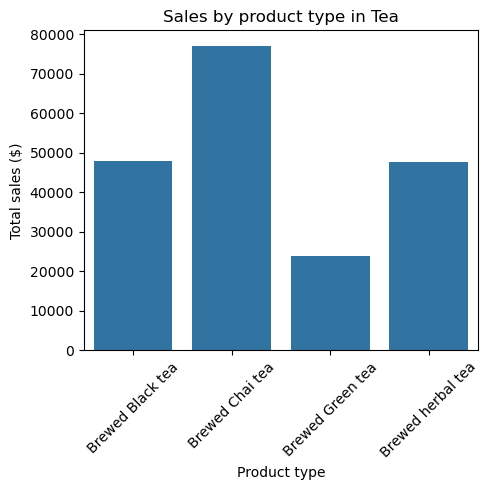

In [24]:
categories = sales_by_category_and_product['product_category'].unique()

for category in categories:
    plt.figure(figsize=(5,5))
    category_data = sales_by_category_and_product[sales_by_category_and_product['product_category'] ==category]
    sns.barplot(data = category_data , x='product_type' , y='sales')

    plt.title(f'Sales by product type in {category}')
    plt.xlabel('Product type')
    plt.ylabel('Total sales ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

In [25]:
hourly_sales_by_location = df.groupby(['hour' , 'store_location'])['sales'].sum().unstack()

hourly_sales_by_location

store_location,Astoria,Hell's Kitchen,Lower Manhattan
hour,,,
6,NaN,7531.17,14369.10
7,19028.80,15961.05,28536.62
8,22805.90,31544.44,28349.53
9,23183.57,32874.29,29111.67
10,24426.12,33605.81,30641.46
11,15498.13,17926.54,12894.47
12,15681.20,11343.10,13168.49
13,15947.87,12070.10,12349.48
14,15175.27,12297.50,13831.97


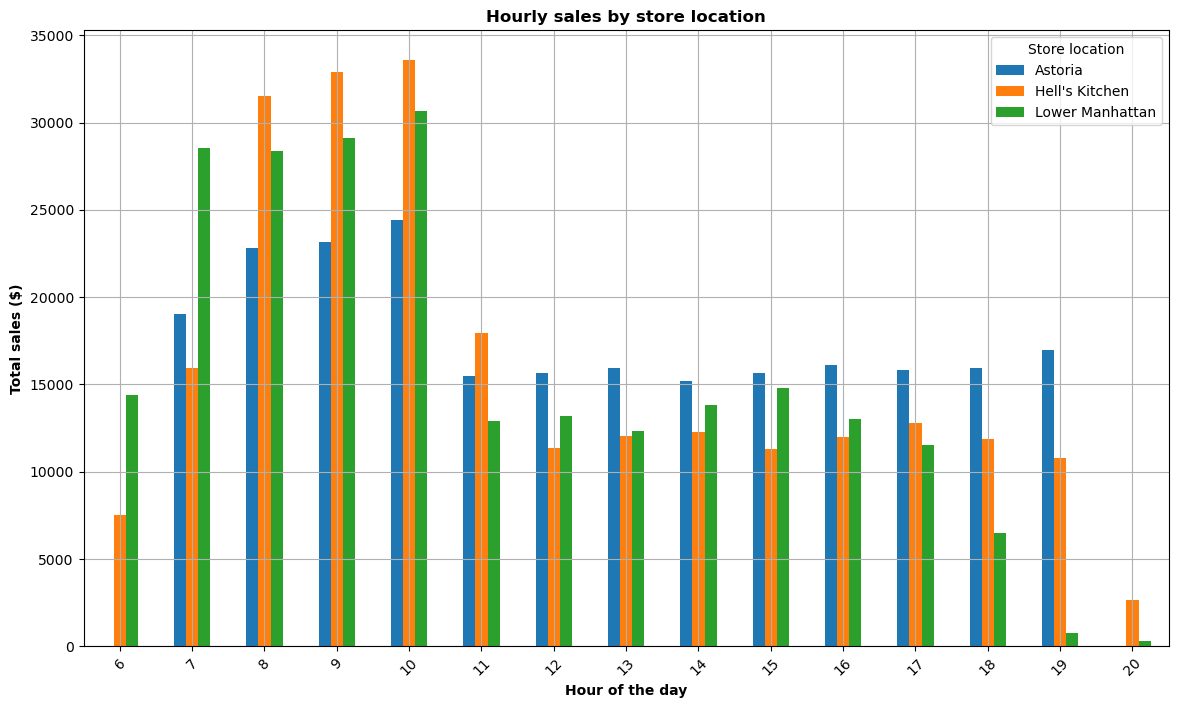

In [26]:
hourly_sales_by_location.plot(kind="bar", figsize=(14,8))

plt.title('Hourly sales by store location', fontweight='bold')
plt.xlabel('Hour of the day' , fontweight='bold')
plt.ylabel('Total sales ($)' , fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Store location' , loc='upper right')
plt.grid(True)
plt.tight_layout

plt.show()